In [2]:
# Generic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
!pip install xgboost

    100% |████████████████████████████████| 142.8MB 350kB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install category_encoders
!pip install geocoder

    100% |████████████████████████████████| 92kB 4.0MB/s ta 0:00:011
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 102kB 3.2MB/s a 0:00:011
    100% |████████████████████████████████| 829kB 22.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
!gunzip listings.csv.gz 

gzip: listings.csv.gz: No such file or directory


In [165]:
df_listing = pd.read_csv('la_listings.csv')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [166]:
df_listing.shape

(43954, 106)

In [167]:
pd.set_option('display.max_columns', None)  # Unlimited columns
pd.set_option('display.max_rows', None)  # Unlimited rows

In [168]:
df_listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                4
summary                                          1698
space                                           11319
description                                       954
experiences_offered                                 0
neighborhood_overview                           14977
notes                                           21588
transit                                         16853
access                                          16670
interaction                                     16005
house_rules                                     13286
thumbnail_url                                   43954
medium_url                                      43954
picture_url                                         0
xl_picture_url              

In [169]:
df_listing.sample(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
19411,3292367,https://www.airbnb.com/rooms/3292367,20190505154550,2019-05-06,"Studio in Hollywod, no parking","Brand new Studio apartment, with brand new app...",Studio apartment comes equipped with brand new...,"Brand new Studio apartment, with brand new app...",none,This studio apartment is in the middle of Holl...,NaN,Metro bus and Metro Red line is one block away.,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/42483325/5...,NaN,16586625,https://www.airbnb.com/users/show/16586625,Steve,2014-06-09,"Los Angeles, California, United States",Landlord,within a day,75%,NaN,f,https://a0.muscache.com/im/users/16586625/prof...,https://a0.muscache.com/im/users/16586625/prof...,Hollywood,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Hollywood Hills,Hollywood Hills,NaN,Los Angeles,CA,90028,Los Angeles,"Los Angeles, CA",US,United States,34.10507,-118.34102,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN,$89.00,NaN,NaN,$150.00,$60.00,1,$0.00,1,1125,1,1,1125,1125,1.0,1125.0,4 weeks ago,t,6,20,43,308,2019-05-06,114,44,2014-08-18,2019-04-18,93.0,10.0,9.0,9.0,9.0,10.0,9.0,f,NaN,"{""City of Los Angeles"","" CA""}",f,f,strict_14_with_grace_period,f,f,2,2,0,0,1.98
5159,15098178,https://www.airbnb.com/rooms/15098178,20190505154550,2019-05-05,Ultra Hip Venice Beach House,My place is close to Venice Boardwalk-Santa Mo...,The space has tile floors for a clean polished...,My place is close to Venice Boardwalk-Santa Mo...,none,NaN,"There's plenty of street parking, bike rentals...",There are bikes you can use the house. Also l...,Guest has access to all common areas of the ho...,There's other air bnb people in the house. Ev...,- Only smoking outside front patio - Can be fl...,NaN,NaN,https://a0.muscache.com/im/pictures/2df38aa7-e...,NaN,52465307,https://www.airbnb.com/users/show/52465307,Dol,2015-12-27,"Los Angeles, California, United States",NaN,within an hour,80%,NaN,f,https://a0.muscache.com/im/pictures/523ff2b8-a...,https://a0.muscache.com/im/pictures/523ff2b8-a...,Venice,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"Los Angeles, CA, United States",Venice,Venice,NaN,Los Angeles,CA,90291,Los Angeles,"Los Angeles, CA",US,

In [170]:
# Dropping columns which are either.
# 1. Difficult to parse. (NLP)
# 2. Not much variance.
# 3. To many NaN values
# 4. Carries no valuable information.

columns = ['listing_url',
           'scrape_id',
           'last_scraped',
           'name',
           'summary',
           'space',
           'description',
           'experiences_offered',
           'neighborhood_overview',
           'notes',
           'transit',
           'access',
           'interaction',
           'house_rules',
           'thumbnail_url',
           'medium_url',
           'picture_url',
           'xl_picture_url',
           'host_id',
           'host_url',
           'host_name',
           'host_location',
           'host_about',
           'host_acceptance_rate',
           'host_thumbnail_url',
           'host_picture_url',
           'host_neighbourhood',
           'host_listings_count',
           'host_verifications',
           'street',
           'neighbourhood',
           'neighbourhood_cleansed',
           'neighbourhood_group_cleansed',
           'city',
           'state',
           'market',
           'smart_location',
           'country_code',
           'country',
           'calendar_last_scraped',
           'license',
           'jurisdiction_names',
           'square_feet',
           'weekly_price',
           'monthly_price']

df_listing.drop(columns=columns, inplace=True)

In [171]:
df_listing.security_deposit.head()

0    $1,000.00
1      $400.00
2      $100.00
3          NaN
4        $0.00
Name: security_deposit, dtype: object

In [172]:
import geocoder
from time import sleep

def get_zipcode_from_latlng(lat, lng):
  
  # Update MapBox API key
  MAPBOX_ACCESS_TOKEN="pk.eyJ1IjoidGZveDE5OTMiLCJhIjoiY2p4Y2htNGwxMDNocDNzbWt3a3o3aHBnZCJ9.zKfqq6BHvhpKlnDk94-_XA"
  
  latlng = [lat, lng]
  g = geocoder.mapbox(latlng, key=MAPBOX_ACCESS_TOKEN, method='reverse')
  sleep(1)
  
  if not g.ok:
    return np.nan
  
  print(f"{lat},{lng},{g.json['postal']}")
  
  return g.json['postal']

def fetch_zipcode(row):
  if isinstance(row['zipcode'], float) and np.isnan(row['zipcode']):
    return get_zipcode_from_latlng(row['latitude'], row['longitude'])

  return row['zipcode']

def cleanup_zipcode(col):
  clean_up = {
      'Near 91304': '91304',
      '90014-3002': '90014',
      '90028\n\n90017': '90028',
      '91744-3228': '91744',
      '90039-2715': '90039',
      'CA91780': '91780',
      'CA91748': '91748',
      '91001-2243': '91001',
      '139 S Valencia Ave, Glendora. 91741': '91741',
      'CA 91765': '91765',
      '90005-3747': '90005',
      '90036-2514': '90036',
      '0': np.nan,
      '900': np.nan,
      '91606-1412': '91606',
      90.0: np.nan
  }
  
  if col in clean_up:
    return clean_up[col]
  
  if isinstance(col, str):
    return col
  
  if np.isnan(col):
    return col
  
  return str(col).split(".")[0]

In [173]:
# Clean up zipcodes
#df_listing['zipcode'] = \
#    df_listing['zipcode'].apply(cleanup_zipcode)

# Update missing zipcodesw
#df_listing['zipcode'] = \
# df_listing.apply(fetch_zipcode, axis=1)

# Export the csv file to avoid invoking of MapBox API repeatedly
#df_listing.to_csv('listings_with_zipcode.csv', index = False, header=True)

#df_listing['zipcode'].nunique()


In [174]:
# Re-init df_listing
df_listing = pd.read_csv('listings_with_zipcode.csv')

In [175]:
def cleanup_hostresponserate(col):
  if isinstance(col, float):
    return 0.0
  
  return int(col.replace('%',''))

def cleanup_securitydeposit(col):
  if isinstance(col, float):
    return 0.0
  
  return float(col.replace('$','').replace(',',''))

def cleanup_cleaningfee(col):
  if isinstance(col, float):
    return 0.0
  
  return float(col.replace('$','').replace(',',''))

In [176]:
# Clean up procedure to removew NaNs

# Fill NaNs as unknown which shall be Label Encoded later
df_listing.host_response_time.fillna(value='unknown', inplace=True)

# Drop rows with NaN for following columns
df_listing.host_since.dropna(inplace=True)
df_listing.dropna(subset=['host_since', 
                  'host_is_superhost', 
                  'host_total_listings_count', 
                  'host_has_profile_pic', 
                  'host_identity_verified',
                  'bathrooms',
                  'bedrooms',
                  'beds'], inplace=True)

# Drop columns which shall not be used for modeling
columns = ['first_review',
           'last_review']

df_listing.drop(columns=columns, inplace=True)

# Convert response rate to float. Here replacing NaN with 0.
df_listing['host_response_rate'] = \
    df_listing['host_response_rate'].apply(cleanup_hostresponserate)

# Convert security deposit to float. Here replacing NaN with 0.
df_listing['security_deposit'] = \
    df_listing['security_deposit'].apply(cleanup_securitydeposit)

# Convert cleaning fee to float. Here replacing NaN with 0.
df_listing['cleaning_fee'] = \
    df_listing['cleaning_fee'].apply(cleanup_cleaningfee)

# Update the missing rewiew score values with median value.
review_columns = ['review_scores_rating',
                  'review_scores_accuracy',
                  'review_scores_cleanliness',
                  'review_scores_checkin',
                  'review_scores_communication',
                  'review_scores_location',
                  'review_scores_value']

for column in review_columns:
  median = df_listing[column].median()
  df_listing[column] = \
    df_listing[column].apply(lambda x: median if np.isnan(x) else x)

# Update the missing rewiew per month values with mean value .
mean = df_listing['reviews_per_month'].mean()
df_listing['reviews_per_month'] = \
    df_listing['reviews_per_month'].apply(lambda x: mean if np.isnan(x) else x)

In [177]:
df_listing.isnull().sum()

id                                              0
host_since                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
zipcode                                         2
latitude                                        0
longitude                                       0
is_location_exact                               0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
bed_type                                        0
amenities                                       0


In [178]:
# Feature Engineering
import category_encoders as ce
from datetime import datetime

In [179]:
# Derive the number of days since hosting from host since.
# Then to avoid colinearity drop host since.
today = datetime.today()

df_listing['host_since'] = pd.to_datetime(df_listing['host_since'])
df_listing['host_since_in_days'] = \
   df_listing['host_since'].apply(lambda x: (today - x).days)

df_listing.drop(columns=['host_since'], inplace=True)

# Update to numerical form
df_listing['host_is_superhost'] = \
   df_listing['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)
df_listing['host_has_profile_pic'] = \
   df_listing['host_has_profile_pic'].apply(lambda x: 1 if x == 't' else 0)
df_listing['host_identity_verified'] = \
   df_listing['host_identity_verified'].apply(lambda x: 1 if x == 't' else 0)
df_listing['is_location_exact'] = \
   df_listing['is_location_exact'].apply(lambda x: 1 if x == 't' else 0)


# Updating the property type to lis only top 10
v = df_listing['property_type'].value_counts() <= 366

df_listing.loc[df_listing['property_type'].isin(v.index[v]), \
               'property_type'] = 'Other'

# Get the total number of listed amenities. Here all amenities are 
# considered to be of same weightable but this is not true mostly.
df_listing['amenities_count'] = \
   df_listing['amenities'].apply(lambda x: len(x.split(",")))

df_listing.drop(columns=['amenities'], inplace=True)

 #Convert price to float
df_listing['price'] = \
   df_listing['price'].apply(lambda x: 
                               float(x.replace('$','').replace(',','')))

# Planning to use adjusted price form calendar. So drop this price.
#df_listing.drop(columns=['price'], inplace=True)

# Convert extra people cost to float
df_listing['extra_people'] = \
    df_listing['extra_people'].apply(lambda x: \
                                     float(x.replace('$','').replace(',','')))

# Group the updates into days, weeks, months, years and never.
calendar_updated = {'today': 'days',
'2 weeks ago': 'weeks',
'a week ago': 'weeks',
'yesterday': 'days',
'3 weeks ago': 'weeks',
'2 months ago': 'months',
'3 days ago': 'days',
'4 days ago': 'days',
'4 weeks ago': 'weeks',
'3 months ago': 'months',
'5 days ago': 'days',
'5 weeks ago': 'months',
'2 days ago': 'days',
'4 months ago': 'months',
'6 weeks ago': 'months',
'5 months ago': 'months',
'6 months ago': 'months',
'6 days ago': 'days',
'9 months ago': 'months',
'7 weeks ago': 'months',
'7 months ago': 'months',
'10 months ago': 'months',
'8 months ago': 'months',
'11 months ago': 'months',
'1 week ago': 'weeks',
'15 months ago': 'years',
'14 months ago': 'years',
'12 months ago': 'years',
'16 months ago': 'years',
'17 months ago': 'years',
'13 months ago': 'years',
'23 months ago': 'years',
'22 months ago': 'years',
'21 months ago': 'years',
'18 months ago': 'years',
'20 months ago': 'years',
'19 months ago': 'years',
'24 months ago': 'years',
'35 months ago': 'years',
'34 months ago': 'years',
'26 months ago': 'years',
'25 months ago': 'years',
'33 months ago': 'years',
'30 months ago': 'years',
'never': 'never',
'28 months ago': 'years',
'27 months ago': 'years',
'29 months ago': 'years',
'36 months ago': 'years',
'31 months ago': 'years',
'41 months ago': 'years',
'37 months ago': 'years',
'39 months ago': 'years',
'42 months ago': 'years',
'32 months ago': 'years',
'38 months ago': 'years',
'46 months ago': 'years',
'40 months ago': 'years',
'44 months ago': 'years',
'45 months ago': 'years',
'43 months ago': 'years',
'47 months ago': 'years',
'48 months ago': 'years',
'49 months ago': 'years',
'53 months ago': 'years',
'51 months ago': 'years',
'57 months ago': 'years',
'54 months ago': 'years',
'52 months ago': 'years',
'50 months ago': 'years',
'56 months ago': 'years',
'59 months ago': 'years',
'61 months ago': 'years',
'55 months ago': 'years',
'60 months ago': 'years',
'58 months ago': 'years',
'87 months ago': 'years',
'62 months ago': 'years',
'65 months ago': 'years',
'72 months ago': 'years',
'70 months ago': 'years'}

df_listing['calendar_updated'] = \
    df_listing['calendar_updated'].apply(lambda x: calendar_updated[x])

#  0 variance to dropping it.
df_listing.drop(columns=['has_availability'], inplace=True)

# Update to numerical form
df_listing['requires_license'] = \
   df_listing['requires_license'].apply(lambda x: 1 if x == 't' else 0)
df_listing['instant_bookable'] = \
   df_listing['instant_bookable'].apply(lambda x: 1 if x == 't' else 0)

#  0 variance to dropping it.
df_listing.drop(columns=['is_business_travel_ready'], inplace=True)

# Update to numerical form
df_listing['require_guest_profile_picture'] = \
   df_listing['require_guest_profile_picture'].apply(lambda x: 1 if x == 't' else 0)
df_listing['require_guest_phone_verification'] = \
   df_listing['require_guest_phone_verification'].apply(lambda x: 1 if x == 't' else 0)


In [180]:
df_listing['price'].head()

0     105.0
1     145.0
2      75.0
3    5000.0
4     120.0
Name: price, dtype: float64

In [181]:
df_listing.require_guest_phone_verification.value_counts()

0    42808
1     1077
Name: require_guest_phone_verification, dtype: int64

In [182]:
df_target = df_listing['price']
df_target = df_listing['price'].replace(0, np.median(df_listing['price']))
df_target.shape

(43885,)

In [183]:
df_features = df_listing
df_features['price'].replace(0, np.median(df_listing['price']))
df_features.shape

(43885, 57)

In [184]:
df_features = df_features.drop(['price'], axis=1)

In [344]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size = 0.2)

In [345]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((35108, 56), (35108,), (8777, 56), (8777,))

In [346]:
def log_transform(y_train, y_test):
    y_train = y_train.copy()
    y_test = y_test.copy()
    
    y_train = np.log(y_train)
    y_test = np.log(y_test)
    return y_train, y_test

In [347]:
y_train, y_test = log_transform(y_train, y_test)
y_train.shape, y_test.shape

((35108,), (8777,))

In [348]:
def encode(X_train, X_test):
    X_train = X_train.copy()
    X_test = X_test.copy()
    
    encode = ce.OrdinalEncoder()
    X_train = encode.fit_transform(X_train)
    X_test = encode.fit_transform(X_test)
    
    return X_train, X_test 

In [349]:
X_train, X_test = encode(X_train, X_test)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35108, 56), (8777, 56), (35108,), (8777,))

In [350]:
X_train.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_in_days,amenities_count
32230,32020479,1,100.0,0,1.0,1,0,90048.0,34.07479,-118.37129,1,1,1,1,1.0,1.0,1.0,1,0.0,150.0,1,0.0,30,60,30,30,60,60,30.0,60.0,1,0,0,0,0,0,0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,1,0,0,1,0,1,0,1.889684,1809,26
18180,1637056,1,100.0,1,1.0,1,1,90048.0,34.06196,-118.36604,1,2,2,2,1.0,1.0,1.0,1,1000.0,100.0,2,100.0,3,1125,3,3,1125,1125,3.0,1125.0,2,26,56,86,361,89,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,2,0,0,1,1,0,0,1.390000,2118,20
26890,4279041,1,100.0,1,1.0,1,1,90272.0,34.04585,-118.53444,1,3,2,2,1.0,1.0,1.0,1,100.0,35.0,1,0.0,2,28,2,2,28,28,2.0,28.0,3,11,34,57,291,343,77,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,3,0,0,1,1,0,0,6.260000,2215,20
30711,24495224,1,100.0,0,2.0,1,0,91011.0,34.21906,-118.22518,1,4,2,8,3.5,4.0,4.0,1,0.0,119.0,8,40.0,2,60,2,2,60,60,2.0,60.0,3,17,29,46,307,40,40,89.0,9.0,8.0,10.0,10.0,10.0,9.0,0,0,1,0,0,2,2,0,0,3.410000,434,33
18477,32747544,1,100.0,0,2.0,1,0,90026.0,34.06582,-118.25784,1,1,2,6,2.0,3.0,3.0,1,150.0,190.0,6,35.0,2,15,2,2,15,15,2.0,15.0,2,4,8,14,14,9,9,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,1,0,0,2,2,0,0,4.740000,117,31


In [351]:
X_train['zipcode'] = X_train['zipcode'].replace(np.nan, np.mean(df_listing['zipcode']))
X_test['zipcode'] = X_test['zipcode'].replace(np.nan, np.mean(df_listing['zipcode']))

In [352]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35108, 56), (8777, 56), (35108,), (8777,))

In [353]:
X_train.isna().sum().sum(), X_test.isna().sum().sum()

(0, 0)

In [354]:
from sklearn.ensemble import RandomForestRegressor

In [355]:
model = RandomForestRegressor(max_depth = None, n_estimators=50, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [356]:
#reasonable score given the low MAE value below
print(model.score(X_test, y_test))
y_pred = model.predict(X_test)

0.7965296382835174


In [357]:
from sklearn.metrics import mean_absolute_error

In [358]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

rmse = (mean_squared_error(y_test, y_pred))**(1/2)
mae, rmse

(0.25851734934961507, 0.3864478181923765)

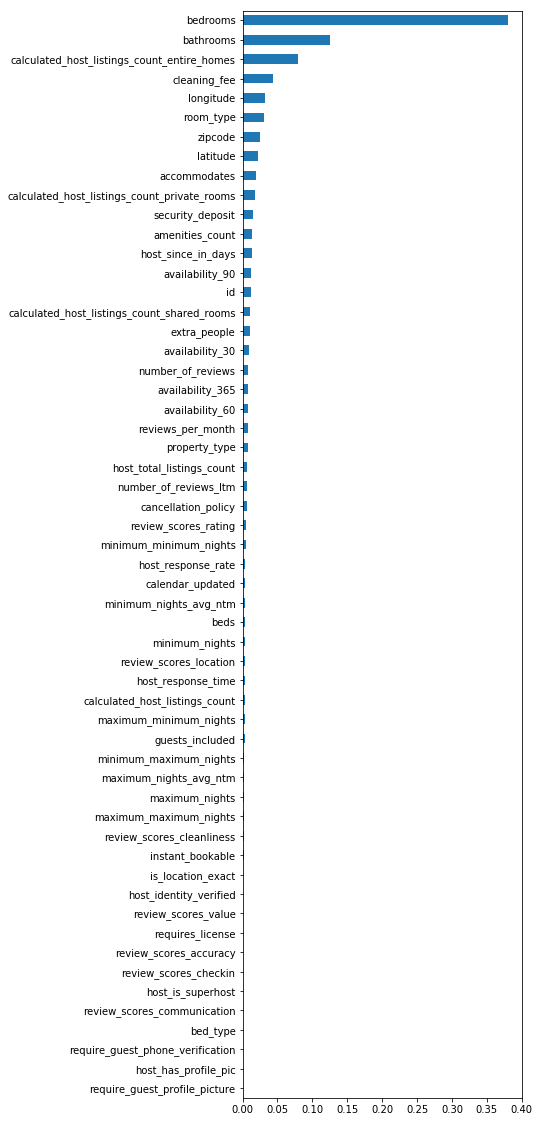

In [359]:
figsize=(5, 20)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()

In [360]:
features = ['bedrooms', 'bathrooms', 'room_type', 'cleaning_fee',
            'zipcode', 'accommodates','security_deposit',
            'amenities_count', 'host_since_in_days']
X_train2 = X_train[features]
X_test2 = X_test[features]


In [367]:
model = RandomForestRegressor(max_depth = None, n_estimators=200, 
                               n_jobs = -1, random_state = 42)

model.fit(X_train2, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [370]:
#reasonable score given the low MAE value below
print(model.score(X_test2, y_test))

0.7614504022007791


In [371]:
from sklearn.metrics import mean_absolute_error

In [372]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

rmse = (mean_squared_error(y_test, y_pred))**(1/2)
mae, rmse

(0.2550151578945854, 0.38339283746471964)

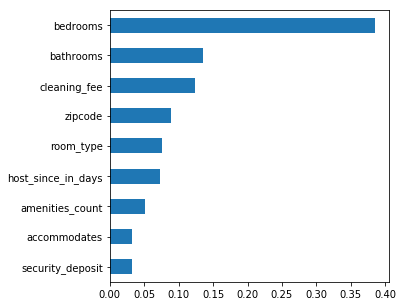

In [374]:
figsize=(5, 5)
plt.figure(figsize=figsize)
importances = pd.Series(model.feature_importances_, X_train2.columns).sort_values()
importances.plot.barh()

In [375]:
from xgboost import XGBRegressor

In [376]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, 
                   n_estimators=100, verbosity=1, n_jobs=-1, 
                   random_state=42)

In [377]:
xgb.fit(X_train, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [378]:
xgb.score(X_test, y_test)

0.7875697217393922

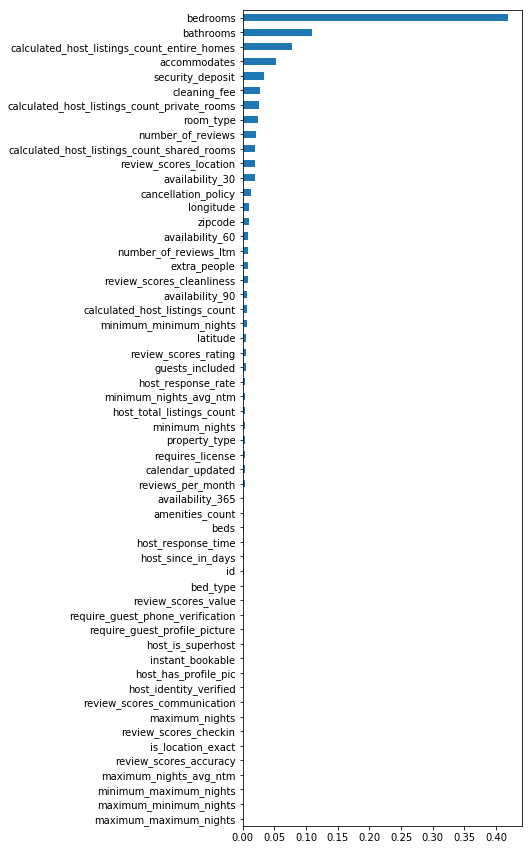

In [379]:
figsize=(5, 15)
plt.figure(figsize=figsize)
importances = pd.Series(xgb.feature_importances_, X_test.columns).sort_values()
importances.plot.barh()

In [380]:
features = ['bedrooms', 'room_type', 'bathrooms', 'security_deposit',
           'accommodates', 'cleaning_fee', 'review_scores_location',
           'availability_30', 'calculated_host_listings_count_shared_rooms']
           
X_train3 = X_train[features]
X_test3 = X_test[features]

In [381]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.1, 
                   n_estimators=100, verbosity=1, n_jobs=-1, 
                   random_state=42)

In [387]:
xgb.fit(X_train3, y_train)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:14:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [388]:
xgb.score(X_test3, y_test)

0.7353484236846697

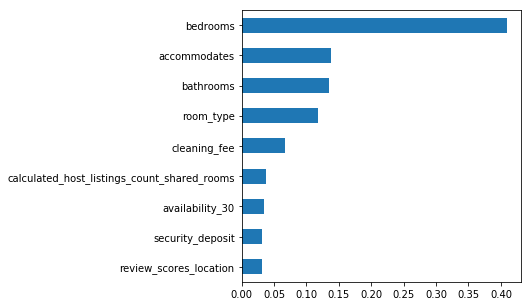

In [390]:
figsize=(5, 5)
plt.figure(figsize=figsize)
importances = pd.Series(xgb.feature_importances_, X_test3.columns).sort_values()
importances.plot.barh()